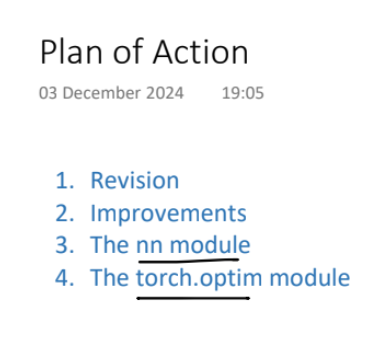

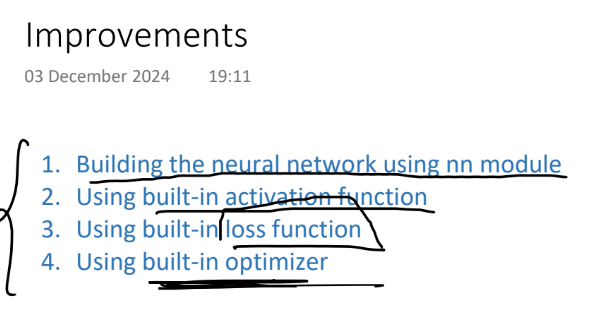

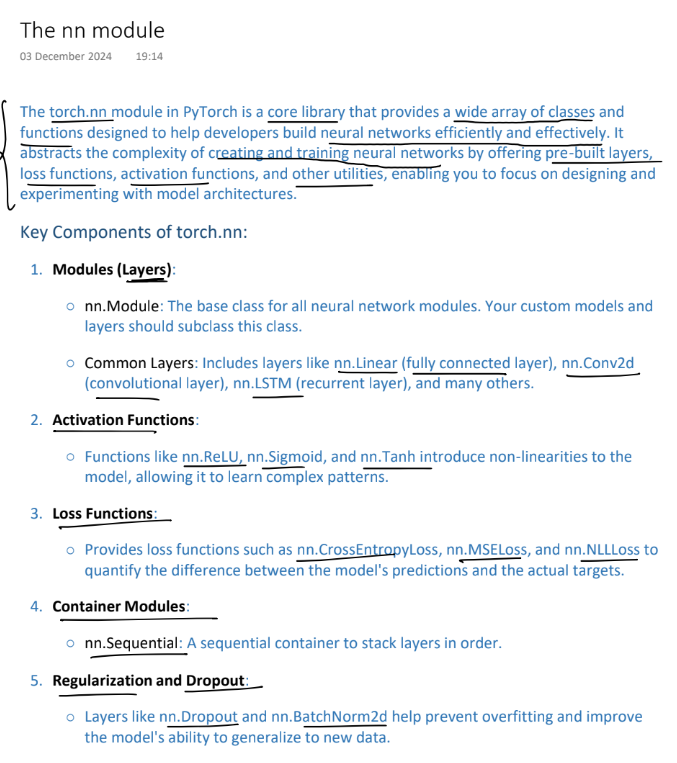

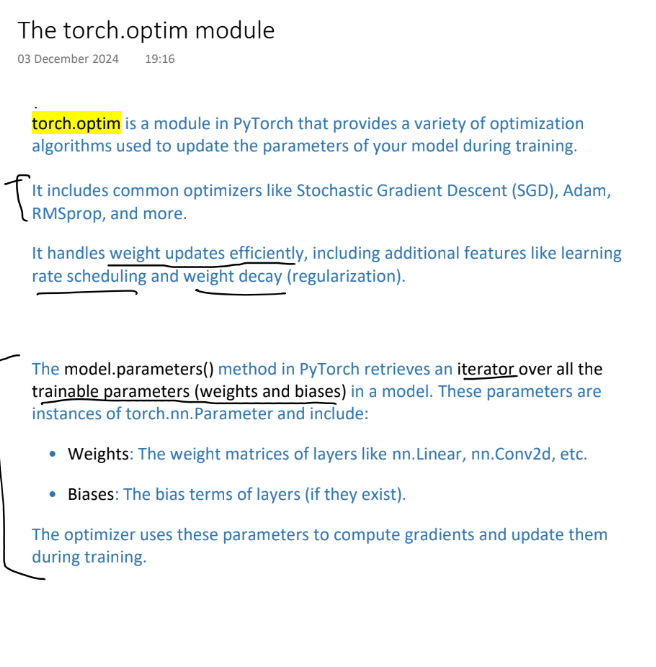

In [22]:
# create model class
# NN with single layer
import torch
import torch.nn as nn

class Model(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

In [23]:
# create dataset
features = torch.rand(10,5)

# create model
model = Model(features.shape[1])

# call model for forward pass
# model.forward(features)
model(features)

tensor([[0.4216],
        [0.3364],
        [0.2960],
        [0.4096],
        [0.3881],
        [0.3807],
        [0.3273],
        [0.3681],
        [0.3376],
        [0.4277]], grad_fn=<SigmoidBackward0>)

In [24]:
# show model weights
model.linear.weight
model.linear.bias

Parameter containing:
tensor([-0.4413], requires_grad=True)

In [25]:
!pip install torchinfo

KeyboardInterrupt: 

In [ ]:
from torchinfo import summary

summary(model, input_size=(10, 5))

In [ ]:
# -----------------------------------------------------------------

In [ ]:
# Neural Network with multiple hidden layer
import torch
import torch.nn as nn

class Model1(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear1 = nn.Linear(num_features, 3)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(3, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear1(features)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)

    return out

In [ ]:
# create dataset
features = torch.rand(10,5)

# create model
model1 = Model1(features.shape[1])

# call model for forward pass
# model.forward(features)
model1(features)

In [ ]:
# Show model
model1.linear1.weight
model1.linear2.weight

In [ ]:
from torchinfo import summary

summary(model1,input_size=(10,5))

In [ ]:
# -----------------------------------------------

In [ ]:
# Neural Network with multiple hidden layer with sequential
import torch
import torch.nn as nn

class Model2(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(num_features, 3),
        nn.ReLU(),
        nn.Linear(3, 1),
        nn.Sigmoid()
    )

  def forward(self, features):

    out = self.network(features)

    return out

In [ ]:
# create dataset
features = torch.rand(10,5)

# create model
model2 = Model2(features.shape[1])

# call model for forward pass
# model.forward(features)
model2(features)

In [ ]:
# --------------------------------------------

## Improving Training Pipeline

In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

### scaling

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train

array([[-0.66996662, -0.48304202, -0.69606422, ..., -0.06252991,
        -0.51825115, -0.70642355],
       [ 1.55936402,  0.54202362,  1.54083227, ...,  1.67191957,
         1.87216691, -0.26495167],
       [-0.33990261, -0.82320857, -0.3152814 , ..., -0.18556179,
        -1.44812865, -0.69029181],
       ...,
       [-1.22352313, -0.90539646, -1.13761025, ...,  0.64565362,
         0.3515819 ,  2.24729755],
       [-0.34549692,  0.05346227, -0.37239883, ..., -0.753609  ,
         0.68426058, -0.36335527],
       [-0.72311252, -0.12689449, -0.75034602, ..., -0.76381164,
         0.67290082, -0.73922475]])

In [9]:
y_train

,diagnosis
187,B
343,M
284,B
465,B
439,B
...,...
535,M
430,M
152,B
436,B


### Label Encoding

In [10]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [11]:
y_train


array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,

### Numpy arrays to PyTorch tensors


In [18]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).float()
y_test_tensor = torch.from_numpy(y_test).float()

In [19]:
X_train_tensor.shape

torch.Size([455, 30])

In [20]:
y_train_tensor.shape

torch.Size([455])

### Defining the model


In [21]:
import torch.nn as nn
class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

  def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    return loss




### Important Parameters

In [22]:
learning_rate = 0.1
epochs = 25

### Training Pipeline

In [23]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(X_train_tensor)

  # loss calculate
  loss = model.loss_function(y_pred, y_train_tensor)

  # backward pass
  loss.backward()

  # parameters update
  with torch.no_grad():
    model.linear.weight -= learning_rate * model.linear.weight.grad
    model.linear.bias -= learning_rate * model.linear.bias.grad

  # zero gradients
  model.linear.weight.grad.zero_()
  model.linear.bias.grad.zero_()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.7261260151863098
Epoch: 2, Loss: 0.7205243706703186
Epoch: 3, Loss: 0.7160537838935852
Epoch: 4, Loss: 0.7122763991355896
Epoch: 5, Loss: 0.7089584469795227
Epoch: 6, Loss: 0.705971360206604
Epoch: 7, Loss: 0.7032403945922852
Epoch: 8, Loss: 0.7007196545600891
Epoch: 9, Loss: 0.6983783841133118
Epoch: 10, Loss: 0.6961946487426758
Epoch: 11, Loss: 0.6941518783569336
Epoch: 12, Loss: 0.6922367215156555
Epoch: 13, Loss: 0.6904382705688477
Epoch: 14, Loss: 0.688746988773346
Epoch: 15, Loss: 0.6871549487113953
Epoch: 16, Loss: 0.685654878616333
Epoch: 17, Loss: 0.6842405200004578
Epoch: 18, Loss: 0.6829060316085815
Epoch: 19, Loss: 0.6816464066505432
Epoch: 20, Loss: 0.6804566383361816
Epoch: 21, Loss: 0.6793325543403625
Epoch: 22, Loss: 0.678270161151886
Epoch: 23, Loss: 0.6772655844688416
Epoch: 24, Loss: 0.6763156056404114
Epoch: 25, Loss: 0.6754168272018433


In [24]:
model.linear.weight

Parameter containing:
tensor([[ 0.1470,  0.0164, -0.0601, -0.1571,  0.1024,  0.0194, -0.1078,  0.0838,
         -0.0687, -0.0152,  0.1143, -0.0732, -0.0846, -0.1002, -0.0112, -0.0988,
          0.1288,  0.0449, -0.0528,  0.0990, -0.0966,  0.0633,  0.0900,  0.0656,
         -0.1197,  0.0330, -0.1812,  0.1352, -0.0605,  0.0769]],
       requires_grad=True)

In [25]:
model.linear.bias

Parameter containing:
tensor([-0.2245], requires_grad=True)

### Evaluation

In [26]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.6052631735801697


In [ ]:
# ---------------------------------------------

# Using builtin loss function

### Creating Model

In [27]:
import torch.nn as nn
class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

###Important Parameters

In [28]:
learning_rate = 0.1
epochs = 25

In [29]:
# buitin loss
loss_function = nn.BCELoss()

### Training Pipeline

In [30]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(X_train_tensor)

  # loss calculate builtin
  loss = loss_function(y_pred, y_train_tensor.view(-1,1)) # view means reshaping

  # backward pass
  loss.backward()

  # parameters update
  with torch.no_grad():
    model.linear.weight -= learning_rate * model.linear.weight.grad
    model.linear.bias -= learning_rate * model.linear.bias.grad

  # zero gradients
  model.linear.weight.grad.zero_()
  model.linear.bias.grad.zero_()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.5601903200149536
Epoch: 2, Loss: 0.44891005754470825
Epoch: 3, Loss: 0.385760098695755
Epoch: 4, Loss: 0.3445490896701813
Epoch: 5, Loss: 0.315039724111557
Epoch: 6, Loss: 0.29257094860076904
Epoch: 7, Loss: 0.2747177481651306
Epoch: 8, Loss: 0.2600840926170349
Epoch: 9, Loss: 0.24780260026454926
Epoch: 10, Loss: 0.23730219900608063
Epoch: 11, Loss: 0.22818942368030548
Epoch: 12, Loss: 0.22018298506736755
Epoch: 13, Loss: 0.2130759060382843
Epoch: 14, Loss: 0.20671190321445465
Epoch: 15, Loss: 0.20097048580646515
Epoch: 16, Loss: 0.19575710594654083
Epoch: 17, Loss: 0.19099614024162292
Epoch: 18, Loss: 0.1866265833377838
Epoch: 19, Loss: 0.1825983226299286
Epoch: 20, Loss: 0.17886991798877716
Epoch: 21, Loss: 0.17540660500526428
Epoch: 22, Loss: 0.17217907309532166
Epoch: 23, Loss: 0.1691623330116272
Epoch: 24, Loss: 0.16633501648902893
Epoch: 25, Loss: 0.1636786311864853


In [32]:
model.linear.weight
model.linear.bias

Parameter containing:
tensor([-0.2115], requires_grad=True)

In [35]:
# Model Evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.5277008414268494


# Using bulitin Optimizers

### Creating Model

In [ ]:
import torch.nn as nn
class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

### Important Parameters

In [36]:
learning_rate = 0.1
epochs = 25

In [37]:
# buitin loss
loss_function = nn.BCELoss()

### Training Pipeline

In [38]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# builtin optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(X_train_tensor)

  # loss calculate builtin
  loss = loss_function(y_pred, y_train_tensor.view(-1,1)) # view means reshaping

  # clear gradient
  optimizer.zero_grad()

  # backward pass
  loss.backward()

  # parameters update
  optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.7942824363708496
Epoch: 2, Loss: 0.567387044429779
Epoch: 3, Loss: 0.45486220717430115
Epoch: 4, Loss: 0.3902989625930786
Epoch: 5, Loss: 0.3480459153652191
Epoch: 6, Loss: 0.3179174065589905
Epoch: 7, Loss: 0.29513707756996155
Epoch: 8, Loss: 0.27716702222824097
Epoch: 9, Loss: 0.26253145933151245
Epoch: 10, Loss: 0.25031203031539917
Epoch: 11, Loss: 0.2399064004421234
Epoch: 12, Loss: 0.23090219497680664
Epoch: 13, Loss: 0.22300711274147034
Epoch: 14, Loss: 0.21600773930549622
Epoch: 15, Loss: 0.20974427461624146
Epoch: 16, Loss: 0.2040945142507553
Epoch: 17, Loss: 0.19896312057971954
Epoch: 18, Loss: 0.19427461922168732
Epoch: 19, Loss: 0.18996812403202057
Epoch: 20, Loss: 0.1859942227602005
Epoch: 21, Loss: 0.1823119968175888
Epoch: 22, Loss: 0.17888742685317993
Epoch: 23, Loss: 0.17569184303283691
Epoch: 24, Loss: 0.1727009266614914
Epoch: 25, Loss: 0.16989387571811676


In [40]:
model.linear.weight
model.linear.bias

Parameter containing:
tensor([[ 0.3631,  0.1102,  0.3647,  0.3823, -0.0271,  0.1367,  0.1882,  0.2103,
          0.2659, -0.0582,  0.1669,  0.0131,  0.3132,  0.0660, -0.0607,  0.0922,
         -0.0215, -0.0046, -0.1352, -0.1141,  0.1327,  0.2701,  0.1873,  0.1312,
          0.2274,  0.2016,  0.1633,  0.2825,  0.0628,  0.0398]],
       requires_grad=True)

In [41]:
# Model Evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.5258541107177734
